In [1]:
from tools import SourceFunctions
from interface import SpectraInterface
import numpy as np
import matplotlib.pyplot as plt

### Generate a field defined by user

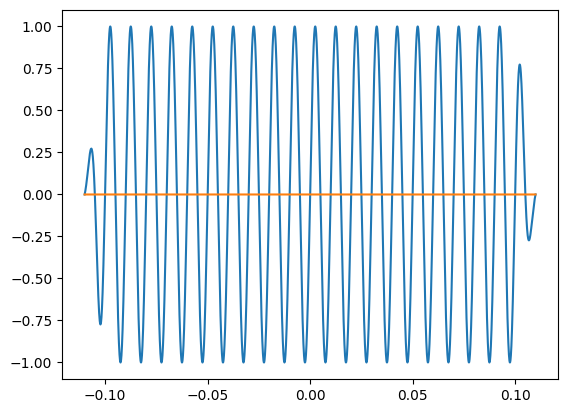

In [2]:
sf = SourceFunctions()
field = sf.create_field_profile(20, 10, 0, 1, 201)

rz = field[:, 0]
bx = field[:, 1]
by = field[:, 2]

plt.plot(rz, bx)
plt.plot(rz, by)

### Create an object to calc flux

In [3]:
spectra = SpectraInterface()

spectra.accelerator.set_high_beta_section()

#  Select source defined by user
spectra.calc_flux.source_type = spectra.calc_flux.CalcConfigs.SourceType.user_defined

spectra.calc_flux.field = field
spectra.calc_flux.indep_var = spectra.calc_flux.CalcConfigs.Variable.energy
spectra.calc_flux.energy_range = [1, 10000]
spectra.calc_flux.energy_step = 1

# Set configuration
spectra.calc_flux.set_config()

In [4]:
result = spectra.calc_flux.run_calculation()

elapsed time: 0.6 s
Calculation Status: 

In [16]:
spectra.calc_flux._input_template['Configurations']['Distance from the Source (m)']

10

In [8]:
data = np.array(result.GetData()['data'])
variables = np.array(result.GetData()['variables'])

In [13]:
captions = result.GetCaptions()
captions

{'details': [],
 'titles': ['Energy', 'Flux Density', 'PL(s1/s0)', 'PC(s3/s0)', 'PL45(s2/s0)'],
 'units': ['eV', 'ph/s/mm^2/0.1%B.W.', '', '', '']}

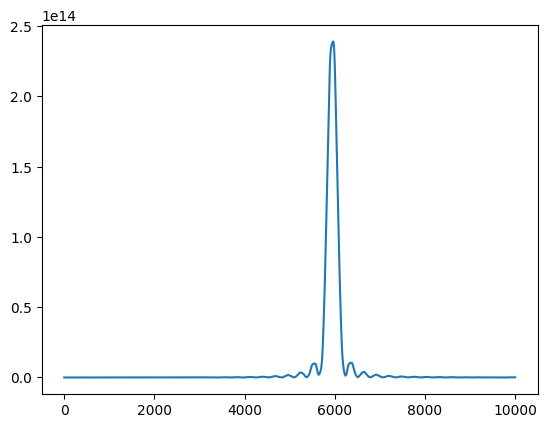

In [11]:
plt.plot(variables[0, :], data[0, :])